Размерность данных: (60, 2)


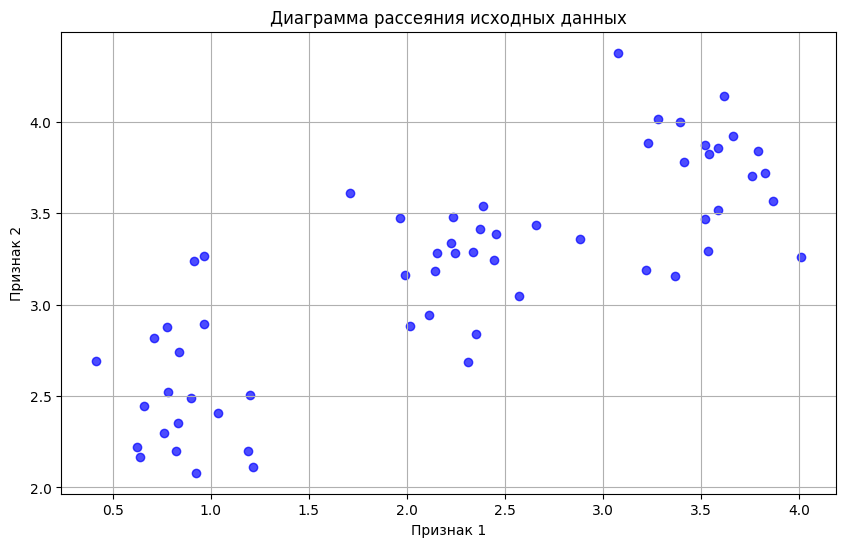

In [29]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('./ЛР_5/Data_Lab5/data2.txt')

print(f"Размерность данных: {data.shape}")
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.7)
plt.title('Диаграмма рассеяния исходных данных')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True)
plt.show()

In [30]:
epsilon = 1e-5
max_iterations = 1000

def k_means_clustering(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    centers = data[indices].copy()
    
    Q_prev = float('inf')
    
    m = 1
    
    while m <= max_iterations:
        distances = np.zeros((len(data), k))
        for j in range(k):
            distances[:, j] = np.sqrt(np.sum((data - centers[j])**2, axis=1))
        
        # Заполнение матрицы U (определение принадлежности точек к кластерам)
        labels = np.argmin(distances, axis=1)
        
        # Расчет функционала качества Q2 (сумма квадратов расстояний)
        Q = 0
        for j in range(k):
            cluster_points = data[labels == j]
            if len(cluster_points) > 0:
                Q += np.sum(np.sum((cluster_points - centers[j])**2, axis=1))
        
        # Шаг 3: Проверка условия остановки
        if abs(Q - Q_prev) <= epsilon:
            print(f"Алгоритм сошелся на итерации {m}")
            break
        
        # Шаг 4: Расчет новых центров кластеров
        for j in range(k):
            cluster_points = data[labels == j]
            if len(cluster_points) > 0:
                centers[j] = np.mean(cluster_points, axis=0)
        
        # Шаг 5: Обновление значения функционала качества
        Q_prev = Q
        m += 1
    
    if m > max_iterations:
        print(f"Достигнуто максимальное число итераций: {max_iterations}")
    
    return centers, labels, Q, m

def visualize_clusters(data, centers, labels, k, title):
    plt.figure(figsize=(10, 6))
    colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']
    
    for i in range(k):
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c=colors[i % len(colors)], label=f'Кластер {i+1}')
    
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Центры')
    plt.title(title)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
max_k = 10
Q_values = []
k_values = range(1, max_k + 1)

for k in k_values:
    print(f"\nТестирование для k = {k}:")
    centers, labels, Q, iterations = k_means_clustering(data, k)
    Q_values.append(Q)
    
    print(f"Функционал качества Q2 = {Q:.4f}, Число итераций = {iterations}")
    for i in range(k):
        cluster_size = np.sum(labels == i)
        print(f"Кластер {i+1}: {cluster_size} объектов")



Тестирование для k = 1:
Алгоритм сошелся на итерации 3
Функционал качества Q2 = 95.2159, Число итераций = 3
Кластер 1: 60 объектов

Тестирование для k = 2:
Алгоритм сошелся на итерации 15
Функционал качества Q2 = 27.0009, Число итераций = 15
Кластер 1: 40 объектов
Кластер 2: 20 объектов

Тестирование для k = 3:
Алгоритм сошелся на итерации 7
Функционал качества Q2 = 8.8325, Число итераций = 7
Кластер 1: 20 объектов
Кластер 2: 20 объектов
Кластер 3: 20 объектов

Тестирование для k = 4:
Алгоритм сошелся на итерации 7
Функционал качества Q2 = 7.3245, Число итераций = 7
Кластер 1: 20 объектов
Кластер 2: 11 объектов
Кластер 3: 9 объектов
Кластер 4: 20 объектов

Тестирование для k = 5:
Алгоритм сошелся на итерации 6
Функционал качества Q2 = 6.4498, Число итераций = 6
Кластер 1: 11 объектов
Кластер 2: 9 объектов
Кластер 3: 9 объектов
Кластер 4: 20 объектов
Кластер 5: 11 объектов

Тестирование для k = 6:
Алгоритм сошелся на итерации 5
Функционал качества Q2 = 4.8228, Число итераций = 5
Класте

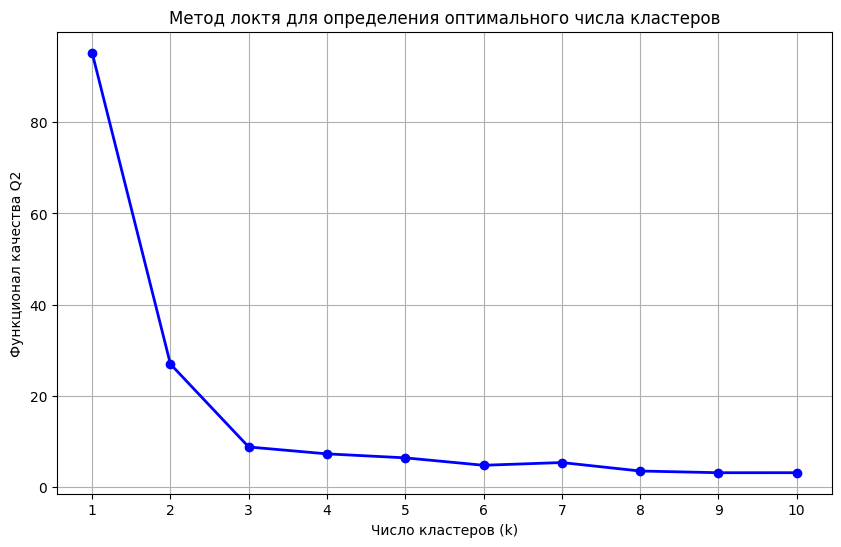

In [32]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, Q_values, 'bo-', linewidth=2)
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Функционал качества Q2')
plt.grid(True)
plt.xticks(k_values)
plt.show()


Запуск алгоритма с оптимальным числом кластеров k = 3
Алгоритм сошелся на итерации 5
Сумма квадратов расстояний до центров кластеров -> min  = 8.8325


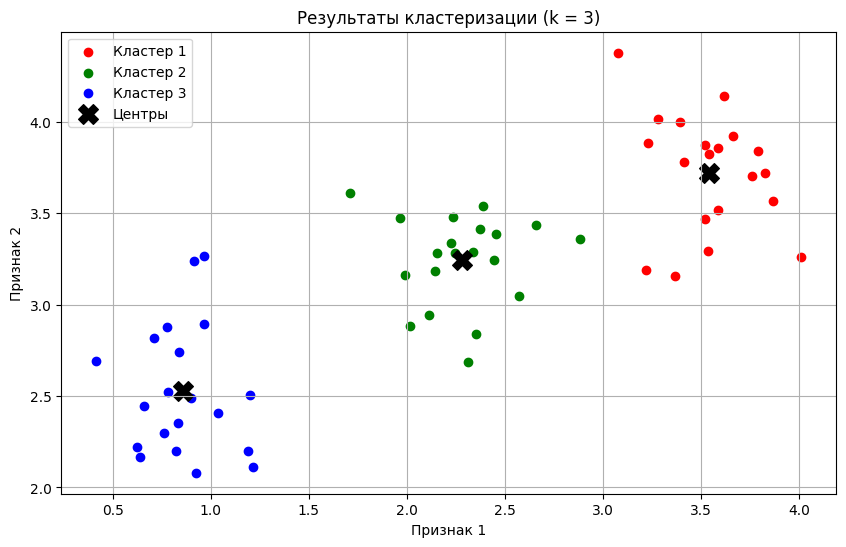


Информация о кластерах:

Кластер 1: 20 объектов
Центр кластера: 3.5398, 3.7194
Среднее расстояние до центра: 0.3486
Стандартное отклонение расстояний: 0.1872

Кластер 2: 20 объектов
Центр кластера: 2.2787, 3.2433
Среднее расстояние до центра: 0.3083
Стандартное отклонение расстояний: 0.1745

Кластер 3: 20 объектов
Центр кластера: 0.8588, 2.5264
Среднее расстояние до центра: 0.3576
Стандартное отклонение расстояний: 0.1779


In [ ]:
optimal_k = 3

print(f"\nЗапуск алгоритма с оптимальным числом кластеров k = {optimal_k}")
centers, labels, Q, iterations = k_means_clustering(data, optimal_k)
print(f"Сумма квадратов расстояний до центров кластеров -> min  = {Q:.4f}")
# Визуализация результатов кластеризации
visualize_clusters(data, centers, labels, optimal_k, f'Результаты кластеризации (k = {optimal_k})')

# Вывод информации о полученных кластерах
print("\nИнформация о кластерах:")
for i in range(optimal_k):
    cluster_points = data[labels == i]
    cluster_size = len(cluster_points)
    print(f"\nКластер {i+1}: {cluster_size} объектов")
    print(f"Центр кластера: {centers[i][0]:.4f}, {centers[i][1]:.4f}")
    
    if cluster_size > 0:
        # Вычисление средних расстояний до центра кластера
        distances = np.sqrt(np.sum((cluster_points - centers[i])**2, axis=1))
        avg_dist = np.mean(distances)
        std_dist = np.std(distances)
        print(f"Среднее расстояние до центра: {avg_dist:.4f}")
        print(f"Стандартное отклонение расстояний: {std_dist:.4f}")